# building scanpy object and exploring the data

In [3]:
import os
import numpy as np
import pandas as pd
import scipy
import anndata
import scanpy as sc
import seaborn as sns
import matplotlib.pyplot as plt

In [70]:
adata = sc.read_h5ad('outs/240701_kinker_anndata.h5ad')


In [71]:
def BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20):
    sc.pp.normalize_total(adata, target_sum=1e4)
    sc.pp.log1p(adata)
    sc.pp.highly_variable_genes(adata, n_top_genes=n_top_genes, flavor='seurat')
    #sc.pp.scale(adata, max_value=10)
    sc.tl.pca(adata, svd_solver='arpack')
    sc.pp.neighbors(adata, n_neighbors=n_neighbors, n_pcs=n_pcs, random_state=random_state)
    sc.tl.umap(adata, random_state=random_state)
    sc.tl.leiden(adata, random_state=random_state)
    return adata

In [72]:
adata = BasicScanpyPreprocessing(adata, n_top_genes=2000, n_neighbors=10, n_pcs=40, random_state=20)


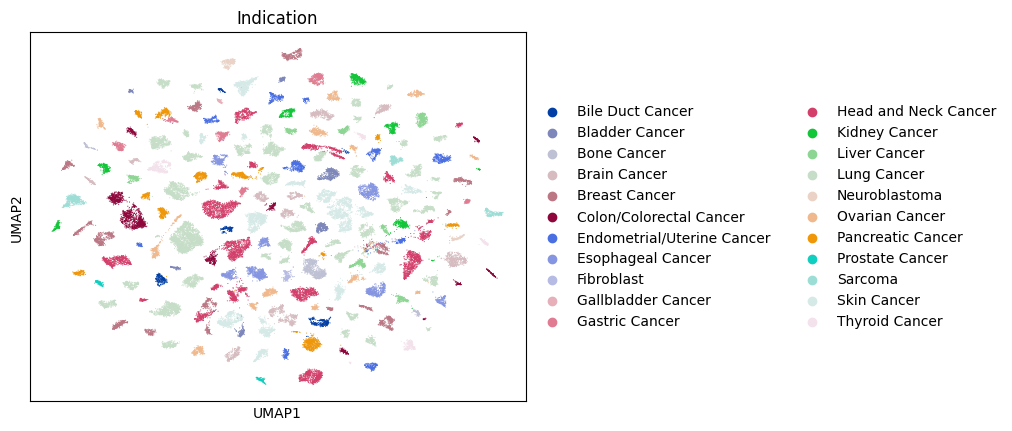

In [73]:
sc.pl.umap(adata, color=['Indication'])


## the paper used tSNE plot 
## notice that there are so many clusters than the F1b in the paper and the number of indications are smaller 

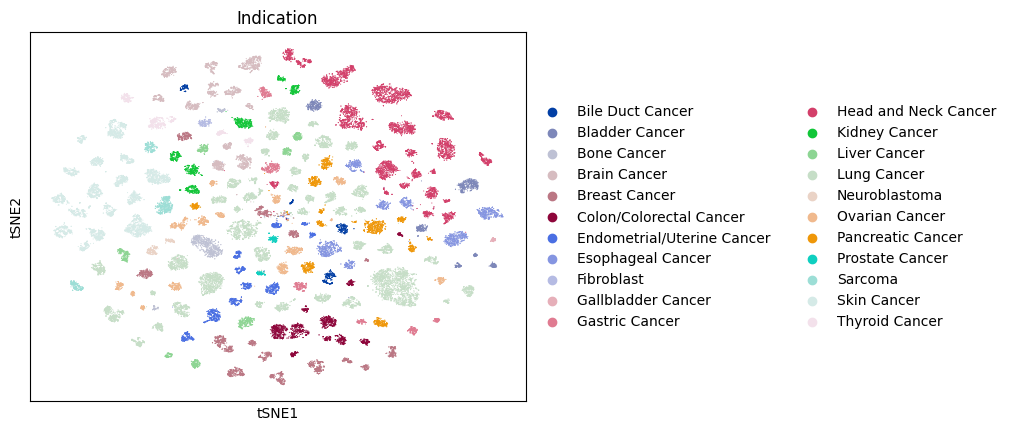

In [74]:
# plotting tSNE 
sc.tl.tsne(adata)
sc.pl.tsne(adata, color=['Indication'])  # Color by gene expression or cluster labels


In [31]:
#saving post preprocessed file to compare result with different parameters
adata.write_h5ad('outs/postPP.h5ad')

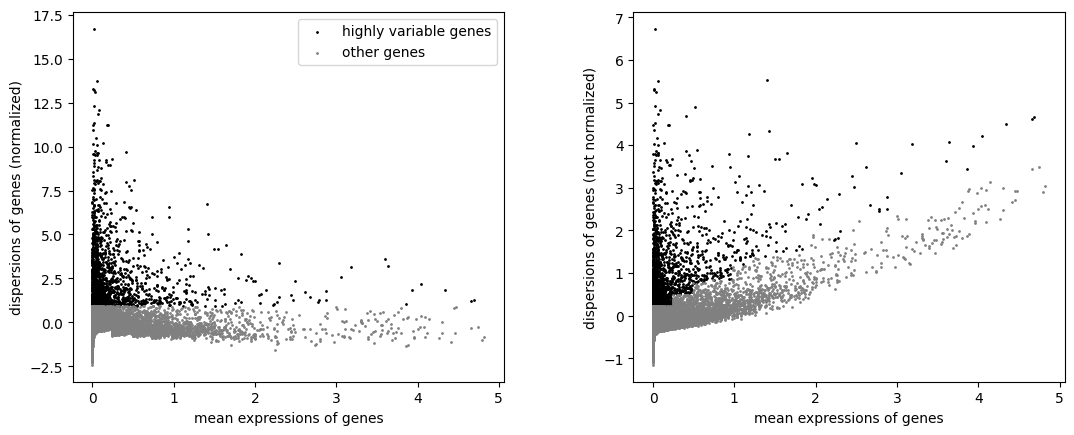

8.7%


In [75]:
sc.pl.highly_variable_genes(adata)
print('%.1f' % np.round(adata.var.highly_variable.sum()/adata.n_vars * 100, 3) + '%')

In [76]:
adata.obs

,CellLine,Pool,Indication,Genes_expressed,Discrete_cluster_minpts5_eps1.8,Discrete_cluster_minpts5_eps1.5,Discrete_cluster_minpts5_eps1.2,CNA_subclone,SkinPig_score,EMTI_score,...,IFNResp_score,p53Sen_score,EpiSen_score,StressResp_score,ProtMatu_score,ProtDegra_score,G1/S_score,G2/M_score,n_genes,leiden
AAACCTGAGACATAAC-1-18,NCIH2126_LUNG,18,Lung Cancer,4318,nan,nan,nan,nan,0.166,-0.045,...,0.130,0.619,1.869,-0.004,0.805,0.896,0.424,-1.125,4323,47
AAACCTGCACAACGCC-1-18,SW579_THYROID,18,Thyroid Cancer,5021,nan,nan,SW579_THYROID_1,nan,-0.056,0.776,...,-0.266,-0.334,-1.125,-0.039,-0.243,-0.642,-0.173,1.365,5034,114
AAACCTGCAGACAAGC-1-18,C32_SKIN,18,Skin Cancer,3047,nan,nan,nan,nan,1.092,0.617,...,0.318,0.570,-0.165,0.074,0.250,0.096,-0.367,-1.135,3055,14
AAACCTGCAGCTCGAC-1-18,SW579_THYROID,18,Thyroid Cancer,2765,nan,nan,SW579_THYROID_1,nan,-0.601,1.038,...,0.341,-0.253,-0.552,0.921,2.876,1.645,0.226,0.469,2769,114
AAACCTGCATGGATGG-1-18,NCIH446_LUNG,18,Lung Cancer,2064,nan,nan,nan,nan,-0.251,-0.325,...,-0.044,-1.256,-0.367,-0.317,0.790,1.925,0.138,-0.384,2065,127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
c4788,JHU029_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,5929,JHU029_UPPER_AERODIGESTIVE_TRACT_1,JHU029_UPPER_AERODIGESTIVE_TRACT_1,JHU029_UPPER_AERODIGESTIVE_TRACT_1,nan,-0.317,-0.390,...,-0.100,-0.604,-0.358,-0.123,0.067,0.804,0.135,0.264,5934,5
c4789,SCC9_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,3531,SCC9_UPPER_AERODIGESTIVE_TRACT_2,SCC9_UPPER_AERODIGESTIVE_TRACT_2,SCC9_UPPER_AERODIGESTIVE_TRACT_2,SCC9_UPPER_AERODIGESTIVE_TRACT_2,0.238,1.176,...,0.014,-0.045,-0.050,0.214,0.238,-0.514,-1.021,-1.243,3532,30
c4793,JHU029_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,4029,JHU029_UPPER_AERODIGESTIVE_TRACT_1,JHU029_UPPER_AERODIGESTIVE_TRACT_3,nan,nan,-0.164,-0.163,...,0.010,-0.008,0.045,0.265,0.054,-0.466,0.345,0.804,4032,5
c4800,SCC9_UPPER_AERODIGESTIVE_TRACT,custom,Head and Neck Cancer,4009,SCC9_UPPER_AERODIGESTIVE_TRACT_1,SCC9_UPPER_AERODIGESTIVE_TRACT_1,SCC9_UPPER_AERODIGESTIVE_TRACT_4,SCC9_UPPER_AERODIGESTIVE_TRACT_1,0.205,0.217,...,-0.257,-0.856,-0.593,0.152,0.022,0.684,0.684,0.624,4011,30


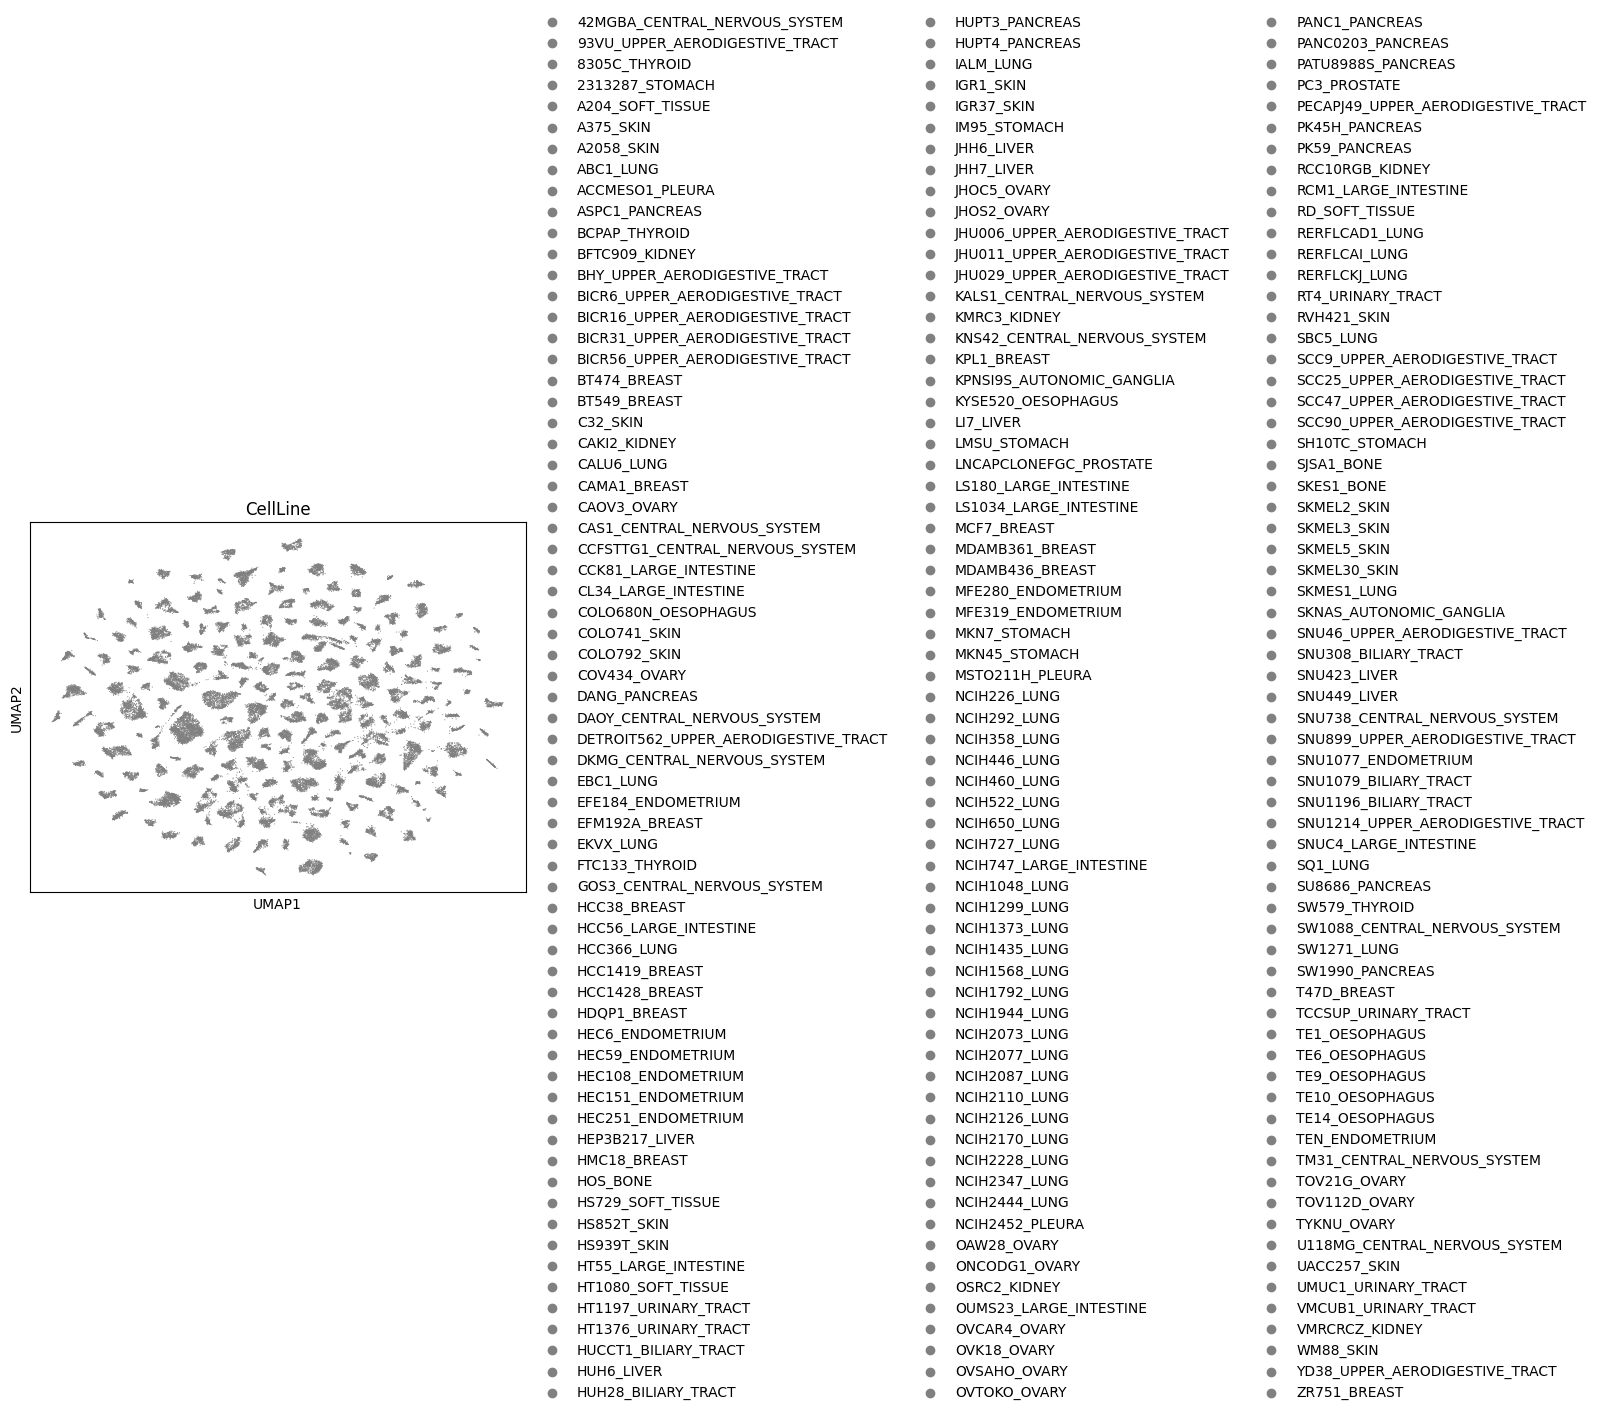

In [77]:
sc.pl.umap(adata, color='CellLine')


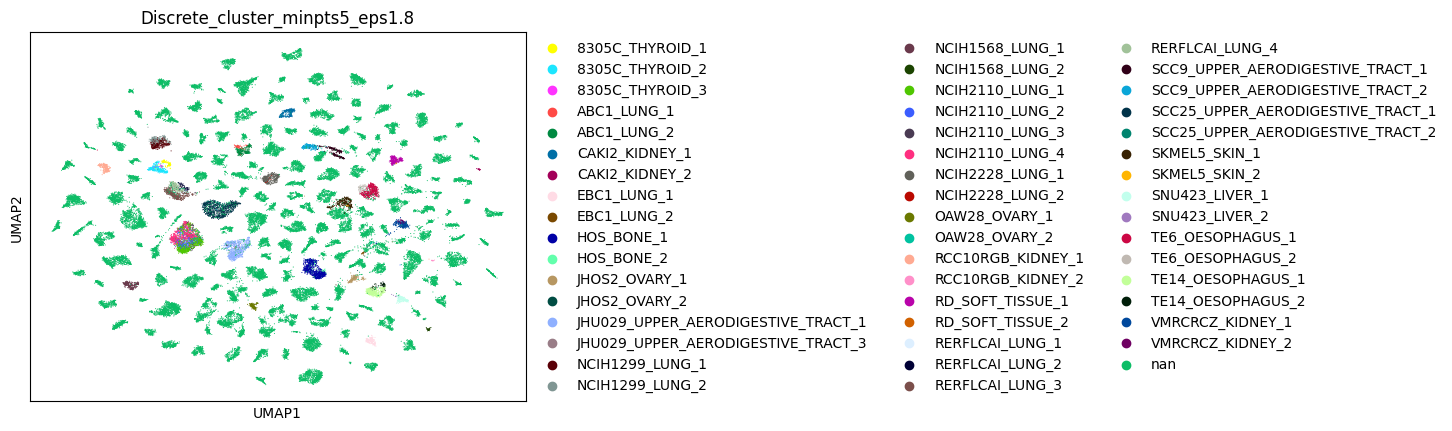

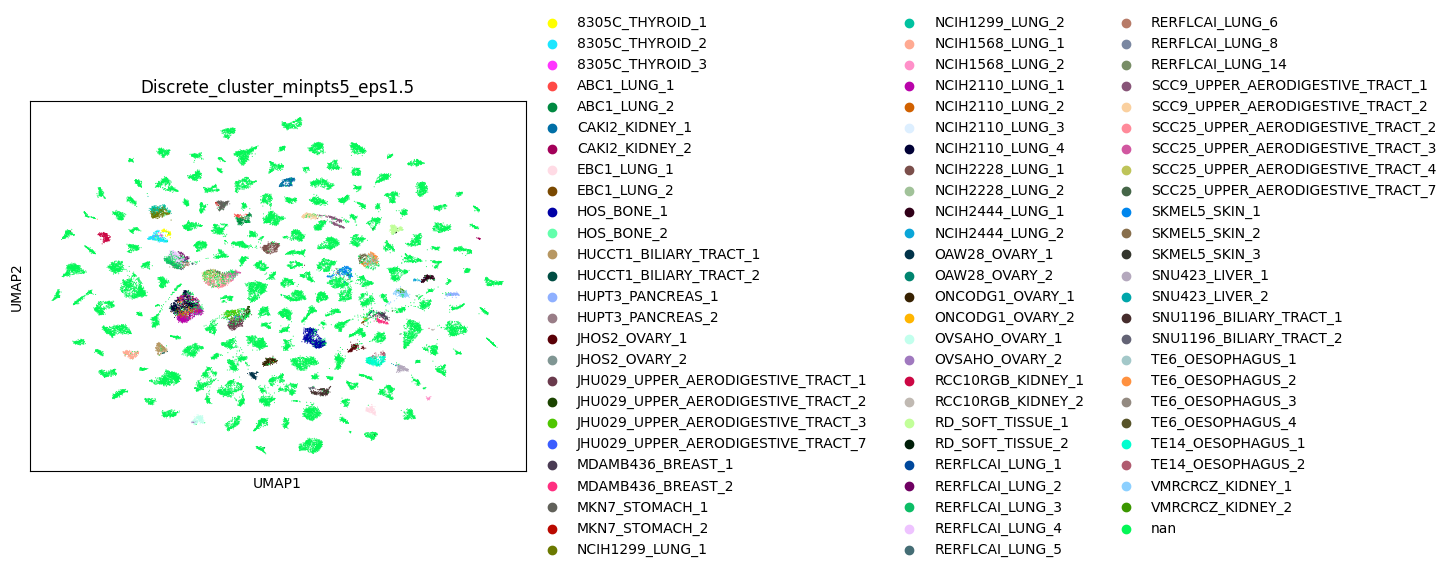

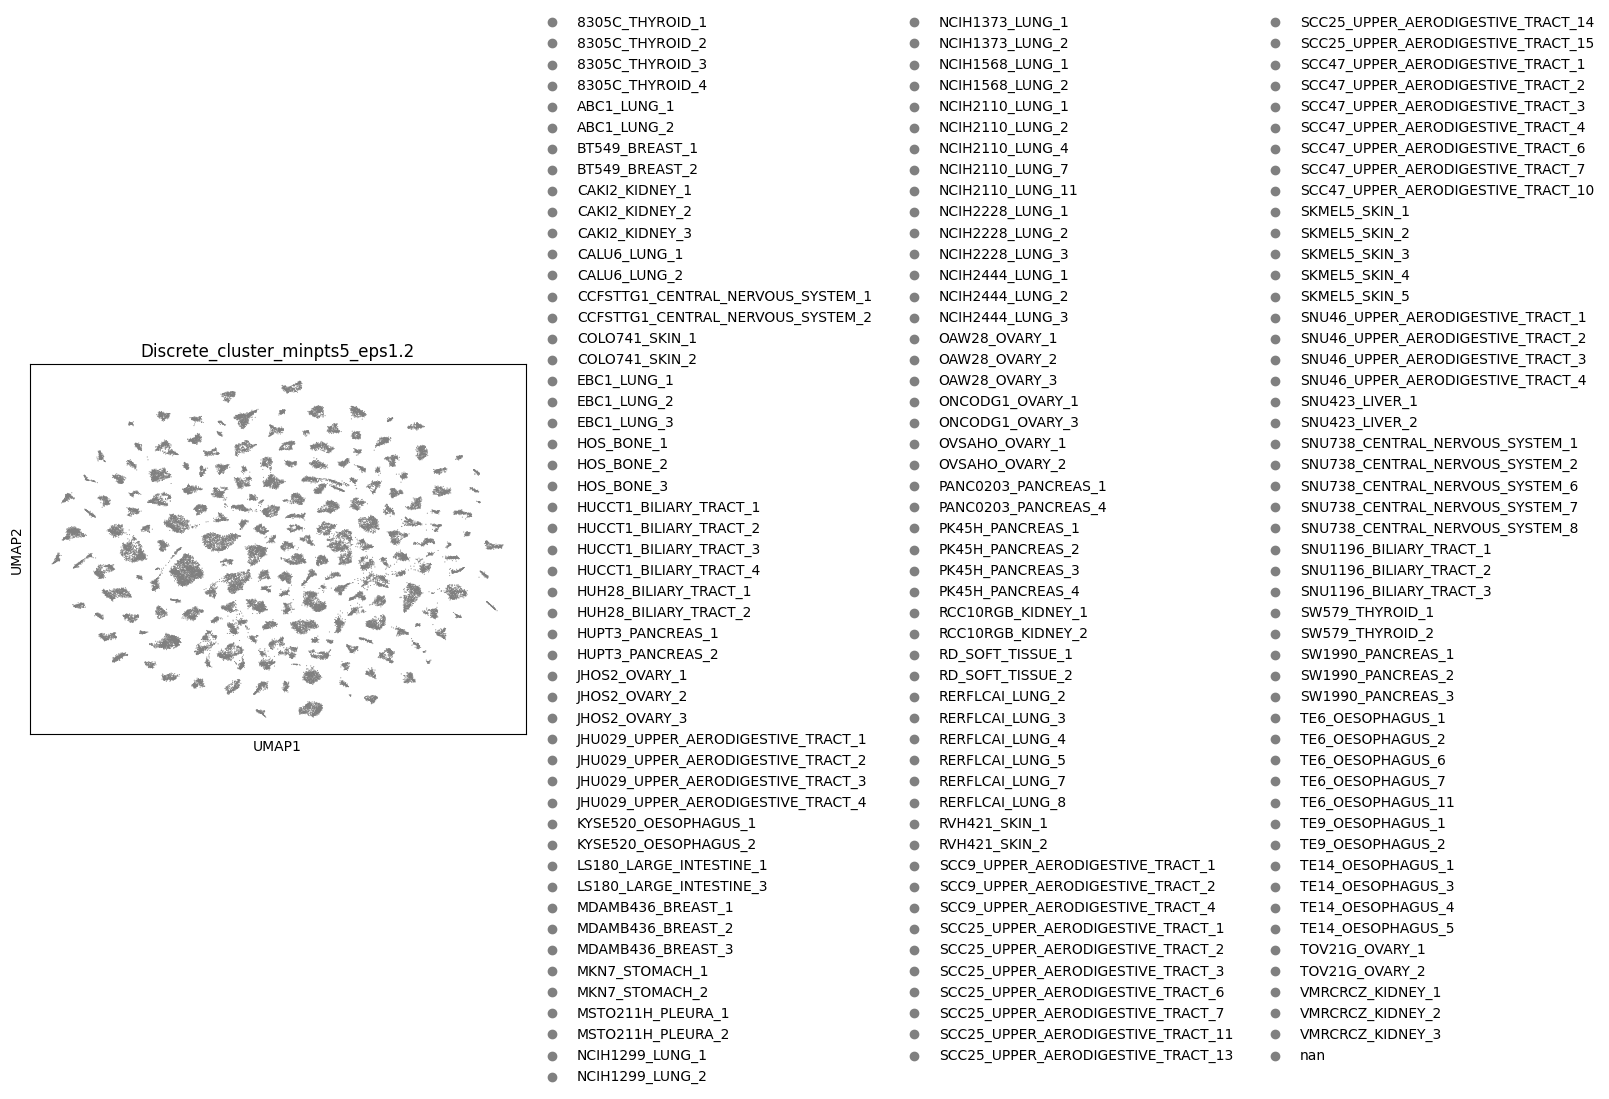

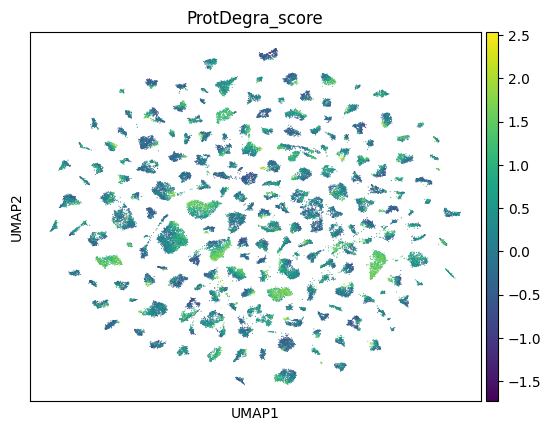

In [79]:
#plotting by different column in the metadata
sc.pl.umap(adata, color='Discrete_cluster_minpts5_eps1.8')
sc.pl.umap(adata, color='Discrete_cluster_minpts5_eps1.5')
sc.pl.umap(adata, color='Discrete_cluster_minpts5_eps1.2')
sc.pl.umap(adata, color='ProtDegra_score')
